<a href="https://colab.research.google.com/github/DFNTAOY/Detecting-Stress-using-NLP/blob/main/Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --upgrade scikit-learn==0.23.0

     |████████████████████████████████| 7.3 MB 25.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.0 which is incompatible.


In [ ]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X, y = load_boston(return_X_y=True)

In [ ]:
X[0], y[0]

(array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]), 24.0)

In [ ]:
knn_model = KNeighborsRegressor().fit(X, y)
knn_pred = knn_model.predict(X)

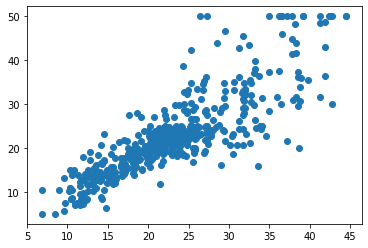

In [ ]:
plt.scatter(knn_pred, y)

In [ ]:
pipe = Pipeline([
      ("scaler", StandardScaler()),
      ("model", KNeighborsRegressor(n_neighbors=2))
])

In [ ]:
pipe.fit(X, y)
pipe_pred = pipe.predict(X)

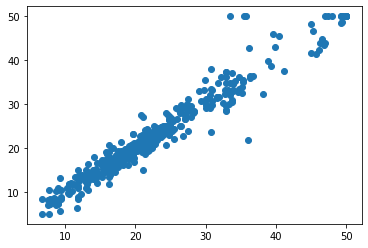

In [ ]:
plt.scatter(pipe_pred, y)

In [ ]:
GS_model = GridSearchCV(
    estimator = pipe,
    param_grid = {"model__n_neighbors": [1,2,3,4,5,6,7,8,9,10]},
    cv = 3
)

In [ ]:
GS_model.fit(X, y)
GS_model_pred = GS_model.predict(X)
pd.DataFrame(GS_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002280,0.000947,0.002638,0.000605,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001473,0.000017,0.002267,0.000184,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001671,0.000257,0.002279,0.000147,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001545,0.000052,0.002601,0.000193,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001494,0.000022,0.002440,0.000135,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001593,0.000109,0.002494,0.000110,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001479,0.000023,0.002497,0.000139,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001485,0.000055,0.002624,0.000111,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001490,0.000011,0.002643,0.000253,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001505,0.000014,0.002649,0.000171,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


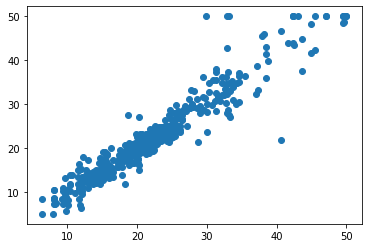

In [ ]:
plt.scatter(GS_model_pred, y)

In [ ]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, TreebankWordTokenizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text = "No more command-line or XML black-magic! Use standard Python features to create your workflows, including date time formats for scheduling and loops to dynamically generate tasks. This allows you to maintain full flexibility when building your workflows"

tokens = word_tokenize(text)
tokenized_words = [word for word in tokens if not word in stopwords.words('english')]

In [ ]:
print(tokens)

['No', 'more', 'command-line', 'or', 'XML', 'black-magic', '!', 'Use', 'standard', 'Python', 'features', 'to', 'create', 'your', 'workflows', ',', 'including', 'date', 'time', 'formats', 'for', 'scheduling', 'and', 'loops', 'to', 'dynamically', 'generate', 'tasks', '.', 'This', 'allows', 'you', 'to', 'maintain', 'full', 'flexibility', 'when', 'building', 'your', 'workflows']


In [ ]:
print(tokenized_words)

['No', 'command-line', 'XML', 'black-magic', '!', 'Use', 'standard', 'Python', 'features', 'create', 'workflows', ',', 'including', 'date', 'time', 'formats', 'scheduling', 'loops', 'dynamically', 'generate', 'tasks', '.', 'This', 'allows', 'maintain', 'full', 'flexibility', 'building', 'workflows']


In [ ]:
paragraph = "In Big Data, an enormous volume of data is used. Regarding data, we have two main challenges. The first challenge is how to collect large volume of data and the second challenge is to analyze the collected data. To overcome those challenges, you must need a messaging system. Kafka is designed for distributed high throughput systems. Kafka tends to work very well as a replacement for a more traditional message broker. In comparison to other messaging systems, Kafka has better throughput, built-in partitioning, replication and inherent fault-tolerance, which makes it a good fit for large-scale message processing applications."
word_token = TreebankWordTokenizer()
tokenized_words = word_token.tokenize(paragraph)

tokenized_words_lower = []
for w in tokenized_words:
  tokenized_words_lower.append(w.lower())

In [ ]:
print(tokenized_words_lower)

['in', 'big', 'data', ',', 'an', 'enormous', 'volume', 'of', 'data', 'is', 'used.', 'regarding', 'data', ',', 'we', 'have', 'two', 'main', 'challenges.', 'the', 'first', 'challenge', 'is', 'how', 'to', 'collect', 'large', 'volume', 'of', 'data', 'and', 'the', 'second', 'challenge', 'is', 'to', 'analyze', 'the', 'collected', 'data.', 'to', 'overcome', 'those', 'challenges', ',', 'you', 'must', 'need', 'a', 'messaging', 'system.', 'kafka', 'is', 'designed', 'for', 'distributed', 'high', 'throughput', 'systems.', 'kafka', 'tends', 'to', 'work', 'very', 'well', 'as', 'a', 'replacement', 'for', 'a', 'more', 'traditional', 'message', 'broker.', 'in', 'comparison', 'to', 'other', 'messaging', 'systems', ',', 'kafka', 'has', 'better', 'throughput', ',', 'built-in', 'partitioning', ',', 'replication', 'and', 'inherent', 'fault-tolerance', ',', 'which', 'makes', 'it', 'a', 'good', 'fit', 'for', 'large-scale', 'message', 'processing', 'applications', '.']


In [ ]:
wordings = [word for word in tokenized_words_lower if not word in stopwords.words('english')]
print(wordings)

['big', 'data', ',', 'enormous', 'volume', 'data', 'used.', 'regarding', 'data', ',', 'two', 'main', 'challenges.', 'first', 'challenge', 'collect', 'large', 'volume', 'data', 'second', 'challenge', 'analyze', 'collected', 'data.', 'overcome', 'challenges', ',', 'must', 'need', 'messaging', 'system.', 'kafka', 'designed', 'distributed', 'high', 'throughput', 'systems.', 'kafka', 'tends', 'work', 'well', 'replacement', 'traditional', 'message', 'broker.', 'comparison', 'messaging', 'systems', ',', 'kafka', 'better', 'throughput', ',', 'built-in', 'partitioning', ',', 'replication', 'inherent', 'fault-tolerance', ',', 'makes', 'good', 'fit', 'large-scale', 'message', 'processing', 'applications', '.']
